In [1]:
# IMAGE PROCESSING
import cv2 # OpenCV library
import numpy as np # Numpy library for matricies
import random
import math
from matplotlib import pyplot as plt # Matplotlib library for plotting
from collections import deque
import heapq

random.seed(42)

In [2]:
# General settings
seed = 42
image_file = "maze1234.png"

# Occupancy map
unsafe_iterations = 3

# BFS
size_of_node_grid = 9
bfs_start_node = 0
bfs_end_node = 99

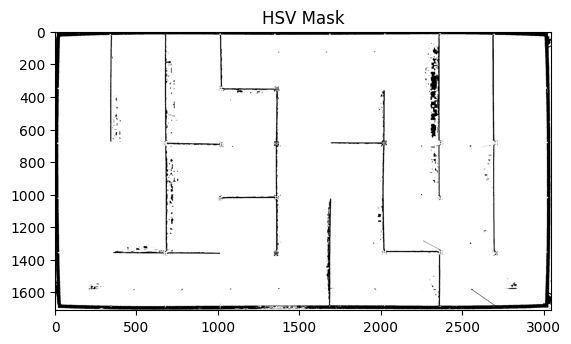

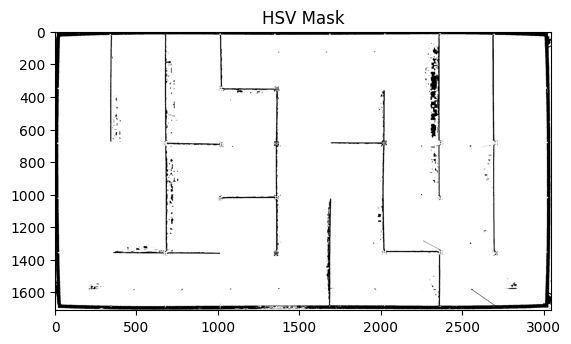

In [3]:
# Loading in the image
image = cv2.imread(image_file)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([0, 8, 104]) # 0 0 102
upper = np.array([179, 255, 255]) # 179 255 224

hsv_mask = cv2.inRange(hsv_image, lower, upper)

# Display the mask
plt.figure(1)
plt.imshow(hsv_mask, cmap='gray')
plt.title("HSV Mask")

plt.show()

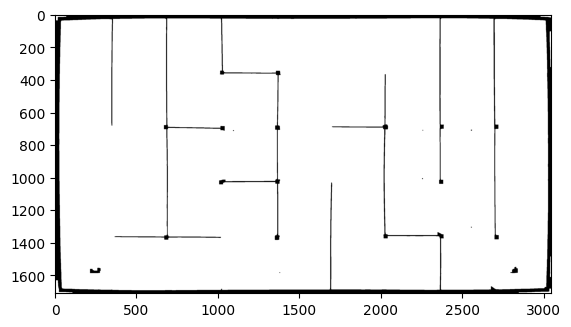

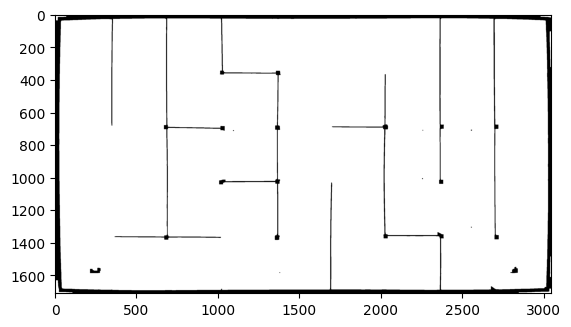

In [4]:
# Applying Erosion + Dilation to the Image

kernel = np.ones((7, 7), np.uint8)
kernel3 = np.ones((3, 3), np.uint8)
kernel4 = np.ones((2, 2), np.uint8)
    
# Loading in the image
image = cv2.imread(image_file)
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower = np.array([0, 0, 104]) # 0 0 102
upper = np.array([179, 255, 225]) # 179 255 224

hsv_mask = cv2.inRange(hsv_image, lower, upper)

# Applying erosion to generate unsafe area
eroded_image = cv2.erode(hsv_mask, kernel, iterations = unsafe_iterations)

kernel2 = np.ones((4, 4), np.uint8)

# Applying dilation to clean up the image
dilated_image = cv2.dilate(eroded_image, kernel2, iterations = 6)
dilated_image2 = cv2.dilate(dilated_image, kernel3, iterations = 2)
erode_image2 = cv2.erode(dilated_image2, kernel4, iterations = 2)
dilTE123 = cv2.dilate(erode_image2,kernel4,iterations = 2)
erode123 = cv2.erode(dilTE123,kernel4,iterations = 3)

# Displays resulting image
gray_image = plt.imshow(erode123, cmap='gray')
plt.show(gray_image)


In [5]:
class Node:
    def __init__(self, node_id, x, y):
        self.id = node_id
        self.x = x
        self.y = y
    
    def get_point(self):
        return (self.x, self.y)
    
    def get_ID(self):
        return self.id

class Graph:
    def __init__(self):
        self.nodes = {} # Keys are node IDs, Values are node objects
        self.edges = {} # Keys are node IDs, Values are objects containing neighbouring node ID and the weight

    def add_node(self, node_id, x, y):
        if node_id not in self.nodes:
            self.nodes[node_id] = Node(node_id, x, y)
            self.edges[node_id] = {}

    def add_edge(self, node_id1, node_id2, weight):
        if node_id1 in self.nodes and node_id2 in self.nodes:
            # Edges are bi-directional
            self.edges[node_id1][node_id2] = weight
            self.edges[node_id2][node_id1] = weight

    def remove_edge(self, node_id1, node_id2):
        if node_id1 in self.edges and node_id2 in self.edges[node_id1]:
            # Edges are bi-directional
            del self.edges[node_id1][node_id2]
            del self.edges[node_id2][node_id1]
    
    def get_nodes(self):
        return list(self.nodes.keys())
    
    def get_edge_weight(self, node_id1, node_id2):
        if node_id1 in self.edges and node_id2 in self.edges[node_id1]:
            return self.edges[node_id1][node_id2]
        return None

In [38]:
def path_clear(image, x1, y1, x2, y2):
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    while True:
        if image[y1, x1].tolist() == [0, 0, 0]:
            return False
        if x1 == x2 and y1 == y2:
            break
        e2 = err * 2
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
#             err += dx
            y1 += sy
    return True

def find_distance(x1, y1, x2, y2):
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def prm_path_clear(image, x1, y1, x2, y2):
    
    distance = int(round(find_distance(x1, y1, x2, y2)))
    
    x_points = np.linspace(x1, x2, distance)
    y_points = np.linspace(y1, y2, distance)
    
    x_points = np.round(x_points).astype(int)
    y_points = np.round(y_points).astype(int)
    
    last_val = None
    for x, y in zip(x_points, y_points):
        
        if last_val is None:
            last_val = image[y, x]
        else:
            if last_val != image[y, x]:
                return False
            else: 
                last_val = image[y, x]

    return True


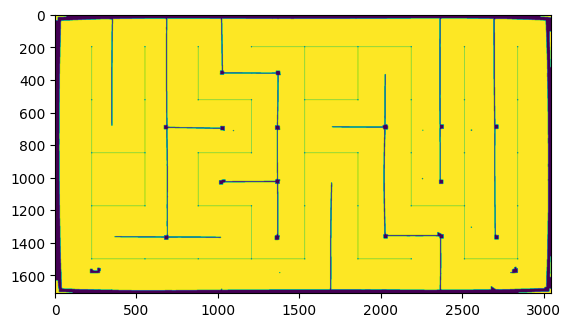

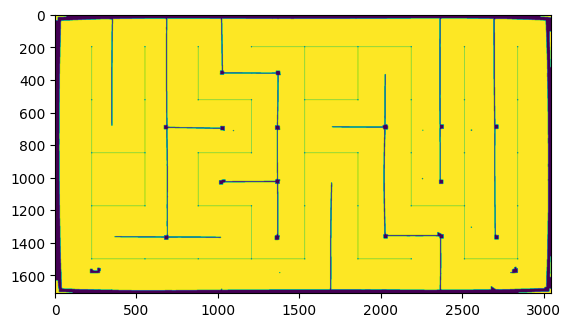

In [40]:
grid_image = erode123.copy()
# grid_image = cv2.cvtColor(erode123, cv2.COLOR_HSV2BGR)
height, width = grid_image.shape
# node_spacing_x = (width // (size_of_node_grid + 1))
# node_spacing_y = (height // (size_of_node_grid + 1))

x_nodes = 9
y_nodes = 5

node_spacing_x = width // (x_nodes + 1)
node_spacing_y = height // (y_nodes + 1)

custom_node_spacing_y = 325
custom_node_spacing_x = 2950 // 9

bfs_graph = Graph()

# The following loops were generated with the help of ChatGPT:]

node_id = 0
for i in range(y_nodes):
    for j in range(x_nodes):
        x = 225 + j * custom_node_spacing_x
        y = 200 + i * custom_node_spacing_y
         
        bfs_graph.add_node(node_id, x, y)
        node_id += 1

# Creating nodes
# node_id = 0
# for i in range(1, size_of_node_grid + 1):
#     for j in range(1, size_of_node_grid + 1):
#         x = j * node_spacing_x
#         y = i * node_spacing_y
         
#         bfs_graph.add_node(node_id, x, y)
#         node_id += 1

# # Adding edges
# for i in range(size_of_node_grid):
#     for j in range(size_of_node_grid):
#         current_node_id = i * size_of_node_grid + j
#         x, y = bfs_graph.nodes[current_node_id].get_point()
#         # Connecting to the right with a weight of 1
#         if j + 1 < size_of_node_grid:
#             right_node_id = current_node_id + 1
#             if path_clear(grid_image, x, y, x + node_spacing_x, y):
#                 bfs_graph.add_edge(current_node_id, right_node_id, 1)
#         # Connecting down with a weight of 1
#         if i + 1 < size_of_node_grid:
#             down_node_id = current_node_id + size_of_node_grid
#             if path_clear(grid_image, x, y, x, y + node_spacing_y):
#                 bfs_graph.add_edge(current_node_id, down_node_id, 1)

nodes = bfs_graph.get_nodes()


for node_id in nodes:
    node_x, node_y = bfs_graph.nodes[node_id].get_point()
    if node_id + 1 in nodes and node_id not in [8, 17, 26, 35, 44] != 0:
        right_node_x, right_node_y = bfs_graph.nodes[node_id + 1].get_point()
        if prm_path_clear(grid_image, node_x, node_y, right_node_x, right_node_y):
            bfs_graph.add_edge(node_id, node_id + 1, 1)
    if node_id + 9 in nodes:
        down_node_x, down_node_y = bfs_graph.nodes[node_id + 9].get_point()
        if prm_path_clear(grid_image, node_x, node_y, down_node_x, down_node_y):
            bfs_graph.add_edge(node_id, node_id + 9, 1)

# Displaying nodes as light green circles with radius 3
for node_id in bfs_graph.get_nodes():
    node_obj = bfs_graph.nodes[node_id]
    x,y = node_obj.get_point();
    cv2.circle(grid_image, node_obj.get_point(), 3, (0, 255, 0), -1)

# Displaying edges as dark green lines with width 1
for node_id in bfs_graph.get_nodes():
    for neighbour_id, weight in bfs_graph.edges[node_id].items():
        node_obj = bfs_graph.nodes[node_id]
        neighbour_obj = bfs_graph.nodes[neighbour_id]
        cv2.line(grid_image, node_obj.get_point(), neighbour_obj.get_point(), (0, 125, 0), 1)

# Labeling first and last nodes
# cv2.putText(grid_image, '0', bfs_graph.nodes[0].get_point(), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)
# cv2.putText(grid_image, '99', bfs_graph.nodes[size_of_node_grid*size_of_node_grid - 1].get_point(), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Displaying resulting image
plt.imshow(grid_image)
plt.show()
